# Python and Friends
This is a very quick run-through of some python syntax

In [1]:
%matplotlib inline 

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [3]:
# working with data types:
import types
a=5.0/6.0
print(a)
print type(a)
print type(a)==types.IntType

0.833333333333
<type 'float'>
False


### Lists and Iteration

In [4]:
# list comprehension
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

**`enumerate`** gives a list of tuples with each tuple of the form (index, value)  
**`zip`** takes elements from each list and outs them together into a tuple, creating a list of tuples

In [5]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0x115084fa0>, [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])

In [6]:
# weird that enumerate returns address reference, zip returns list, so...
from itertools import izip
izip(alist, asquaredlist)

In [7]:
# how to access values inside enumerate object
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

In [10]:
# can iterate thru files as well, line by line
linelengths=[len(line) for line in open("./Resources/hamlet.txt")] # remember to close the file
print linelengths

[9, 27, 2, 24, 2, 2, 2, 2, 22, 2, 28, 60, 29, 28, 27, 22, 22, 24, 25, 18, 24, 11, 21, 20, 22, 32, 10, 28, 31, 12, 22, 27, 2, 51, 32, 2, 67, 13, 2, 18, 2, 2, 2, 8, 2, 50, 2, 49, 2, 6, 14, 2, 7, 45, 2, 6, 21, 2, 7, 11, 2, 6, 5, 2, 7, 41, 2, 6, 53, 2, 7, 48, 25, 2, 6, 27, 2, 7, 23, 2, 6, 19, 39, 46, 2, 7, 48, 2, 32, 2, 6, 25, 2, 6, 27, 2, 7, 22, 2, 6, 30, 24, 2, 7, 24, 22, 2, 9, 2, 6, 18, 2, 6, 6, 25, 2, 6, 17, 2, 6, 45, 2, 6, 47, 2, 6, 22, 2, 6, 36, 42, 48, 38, 45, 37, 42, 2, 6, 32, 2, 6, 18, 41, 42, 31, 2, 6, 20, 41, 2, 6, 20, 51, 51, 43, 30, 2, 6, 51, 2, 23, 2, 6, 48, 2, 6, 43, 2, 6, 47, 2, 6, 49, 2, 6, 23, 2, 6, 23, 2, 6, 50, 42, 40, 54, 2, 6, 17, 2, 6, 22, 2, 6, 42, 2, 15, 2, 6, 33, 2, 6, 46, 42, 22, 2, 6, 41, 38, 19, 2, 6, 26, 2, 6, 25, 36, 40, 45, 42, 15, 2, 6, 48, 47, 2, 6, 48, 44, 48, 2, 6, 49, 47, 43, 43, 41, 50, 43, 46, 50, 30, 2, 6, 13, 47, 42, 44, 45, 53, 53, 53, 36, 50, 45, 39, 43, 35, 50, 39, 49, 36, 47, 41, 39, 48, 42, 39, 46, 45, 41, 50, 44, 2, 6, 37, 47, 49, 45, 2, 6, 41

In [11]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

(180718, 26.69394387001477, 26.0, 21.029872021427462)

In [13]:
# how about word by word, instead of line by line

hamletfile=open("./Resources/hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split() #split with no arguments splits on whitespace
len(hamlettokens)

31659

**`with`** creates a context. The file closing is then done automatically

In [14]:
with open("./Resources/hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print len(hamlettokens)

31659


### Index in Lists

In [43]:
# first 100 characters from Hamlet.
print hamlettext[:100]

# i.e. from start to 100

﻿XXXX
HAMLET, PRINCE OF DENMARK

by William Shakespeare




PERSONS REPRESENTED.

Claudi


In [18]:
# last 100 characters from Hamlet.
print hamlettext[-100:]

# i.e. from -100 to end
# [100:] will print from 100 to end!

march.]

[Exeunt, bearing off the dead bodies; after the which a peal of
ordnance is shot off.]



In [19]:
# token 2, 3 and 4
print hamlettokens[1:4]

['HAMLET,', 'PRINCE', 'OF']


In [21]:
# first 4 tokens
hamlettokens[:4]

['\xef\xbb\xbfXXXX', 'HAMLET,', 'PRINCE', 'OF']

In [23]:
# first token
hamlettokens[0]

'\xef\xbb\xbfXXXX'

In [24]:
# last token
hamlettokens[-1]

'off.]'

In [25]:
# get every 2nd word between the 2nd and the 8th: ie 2nd, 4th, 6th, and 8th words
hamlettokens[1:8:2]

['HAMLET,', 'OF', 'by', 'Shakespeare']

**`range`** and **`xrange`** get the list of integers upto N.  
But xrange behaves like an iterator. Why?  
There is no point generating all N integers. We can just add 1 to the previous one and save memory. So we trade off storage for computation.

In [28]:
mylist=[]
for i in xrange(10):
    mylist.append(i)
print mylist

mylist=[]
for i in range(10):
    mylist.append(i)
print mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Dictionaries

In [32]:
# ways to declare and initialize
adict={'one':1, 'two': 2, 'three': 3}
anotherdict = dict(one=1, two=2, three=3)

print adict, anotherdict

{'three': 3, 'two': 2, 'one': 1} {'three': 3, 'two': 2, 'one': 1}


In [33]:
# iteration, reverse order
print [i for i in adict]
print [(k,v) for k,v in adict.items()]
print adict.values()

['three', 'two', 'one']
[('three', 3), ('two', 2), ('one', 1)]
[3, 2, 1]


In [34]:
# dictionary comprehensions
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

In [35]:
# convert to JSON :)
import json

s=json.dumps(mydict)
print s
# notice the "" vs. '' in declaration

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [36]:
json.loads(s)

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

### Strings
i.e. immutable list of chars

In [37]:
lastword=hamlettokens[-1]
print(lastword)

off.]


In [38]:
# immutable
lastword[-2]="k"

TypeError: 'str' object does not support item assignment

In [40]:
# Can join a list (eg. of tokens) with a separator to make a string.
wierdstring=",".join(hamlettokens)
wierdstring[:100] 

'\xef\xbb\xbfXXXX,HAMLET,,PRINCE,OF,DENMARK,by,William,Shakespeare,PERSONS,REPRESENTED.,Claudius,,King,of,Denm'

### Functions

In [44]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

(25, 125)

In [45]:
# functions can be passed in as args to other functions i.e. "first-class"
def sum_of_anything(x,y,f):
    print x,y,f
    return(f(x) + f(y))
sum_of_anything(3,4,square)

3 4 <function square at 0x1154382a8>


25

Python functions can have **positional** arguments and **keyword** arguments.  
Positional arguments are stored in a tuple, and keyword arguments in a dictionary. Note the **"starred"** syntax

In [46]:
def f(a,b,*posargs,**dictargs):
    print "got",a,b,posargs, dictargs
    return a
print f(1,3) # no tuple or dict
print f(1,3,4,d=1,c=2) # tuple (4,) and dict

got 1 3 () {}
1
got 1 3 (4,) {'c': 2, 'd': 1}
1


In [49]:
# Create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

res = {k:cube(k) for k in xrange(0,11)}
print res

{0: 0, 1: 1, 2: 8, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000}


### Booleans and Control

In [52]:
# Test for belonging
a=[1,2,3,4,5]
print 1 in a, 6 in a

True False


In [53]:
# if-elif, break, continue a la C++
i=0
while i < 10:
    print i
    i=i+1
    if i < 5:
        continue
    else:
        break

0
1
2
3
4


### Exception handling

In [55]:
# try-catch equivalent
try:
    f(1) # needs atleast 2 arguments
except:
    import sys
    print sys.exc_info()

(<type 'exceptions.TypeError'>, TypeError('f() takes at least 2 arguments (1 given)',), <traceback object at 0x1147ca7e8>)


### All together now  
Lets see what hamlet gives us

In [56]:
# convert text to lower case
hamletlctokens=[word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

95

Find a unique set of words using python's **`set`** data structure.  
Count how often those words occured using the count method on lists.

In [57]:
uniquelctokens=set(hamletlctokens)

In [63]:
# create a dictionary w/ key = unique token, val = count of token
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)

We find the 100 most used words...

In [64]:
# sorted(iterable, comparator(), key(), reverse)
# i.e. key is sent to comparator

L = sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]
L[0:100]

[('the', 1136),
 ('and', 943),
 ('to', 720),
 ('of', 667),
 ('a', 527),
 ('my', 512),
 ('i', 510),
 ('in', 420),
 ('you', 412),
 ('ham.', 358),
 ('that', 337),
 ('it', 324),
 ('is', 320),
 ('his', 295),
 ('not', 270),
 ('with', 264),
 ('this', 250),
 ('your', 241),
 ('for', 231),
 ('but', 228),
 ('as', 216),
 ('he', 202),
 ('be', 201),
 ('what', 183),
 ('have', 174),
 ('will', 149),
 ('so', 143),
 ('me', 142),
 ('we', 132),
 ('do', 128),
 ('are', 126),
 ('him', 122),
 ('our', 119),
 ('king.', 113),
 ('by', 111),
 ('hor.', 110),
 ('or', 109),
 ('if', 109),
 ('on', 109),
 ('no', 107),
 ('shall', 106),
 ('thou', 95),
 ('all', 95),
 ('from', 95),
 ('they', 93),
 ('let', 92),
 ('good', 88),
 ('at', 86),
 ('thy', 86),
 ('pol.', 86),
 ('how', 84),
 ('most', 82),
 ('lord,', 81),
 ('her', 76),
 ('more', 76),
 ('queen.', 76),
 ('like', 75),
 ('would', 74),
 ('was', 73),
 ("'tis", 70),
 ('you,', 66),
 ('may', 65),
 ('very', 64),
 ('laer.', 62),
 ('hath', 62),
 ('[enter', 61),
 ('lord.', 60),
 ('d

Lets get the top 20 of this and plot a bar chart!

[('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527), ('my', 512), ('i', 510), ('in', 420), ('you', 412), ('ham.', 358), ('that', 337), ('it', 324), ('is', 320), ('his', 295), ('not', 270), ('with', 264), ('this', 250), ('your', 241), ('for', 231), ('but', 228)]


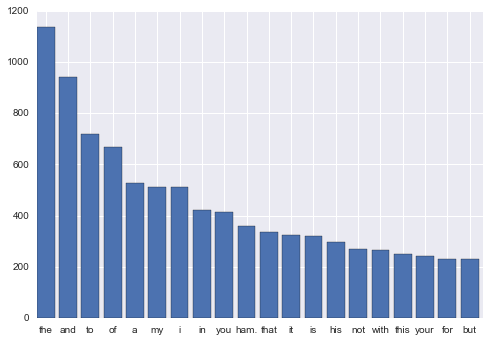

In [68]:
topfreq=L[:20]
print topfreq
pos = np.arange(len(topfreq)) # Return evenly spaced values within interval i.e. for bar width
plt.bar(pos, [e[1] for e in topfreq]); # e[1] = vals
plt.xticks(pos+0.4, [e[0] for e in topfreq]); # e[0] = keys